In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder

from statsmodels.tools.eval_measures import rmse

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting

from sklearn import metrics

In [2]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\Advertising.csv"

In [3]:
# load the training data from glass data set
df_training = pd.read_csv(location)

In [4]:
df_training.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# check the shape of the DataFrame (rows, columns)
df_training.shape

(200, 5)

In [5]:
df_training.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [26]:
# What are the features?

# TV: advertising dollars spent on TV for a single product in a given market 
#    (in thousands of dollars)
# Radio: advertising dollars spent on Radio
# Newspaper: advertising dollars spent on Newspaper

# What is the response?

# Sales: sales of a single product in a given market (in thousands of items)

# What else do we know?

# Because the response variable is continuous, this is a regression problem.
# There are 200 observations (represented by the rows), and each observation is a single market.

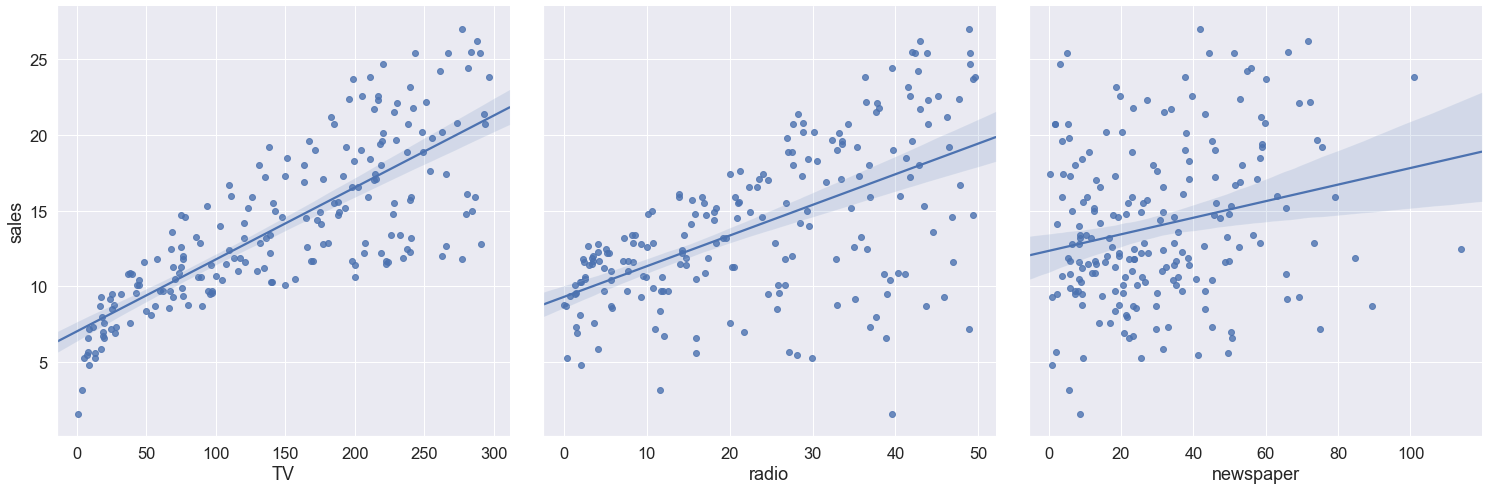

In [6]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_training, 
             x_vars=['TV','radio','newspaper'], 
             y_vars='sales', 
             height=7, 
             aspect=1, 
             kind='reg');

In [28]:
# Linear regression
# Pros: fast, no tuning required, highly interpretable, well-understood

# Cons: unlikely to produce the best predictive accuracy (presumes a linear relationship 
#                                                         between the features and response)

In [8]:
df_training.sample(5)

,Unnamed: 0,TV,radio,newspaper,sales
154,155,187.8,21.1,9.5,15.6
103,104,187.9,17.2,17.9,14.7
38,39,43.1,26.7,35.1,10.1
16,17,67.8,36.6,114.0,12.5
166,167,17.9,37.6,21.6,8.0


In [7]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]

# select a Series from the DataFrame
y = df_training['sales']

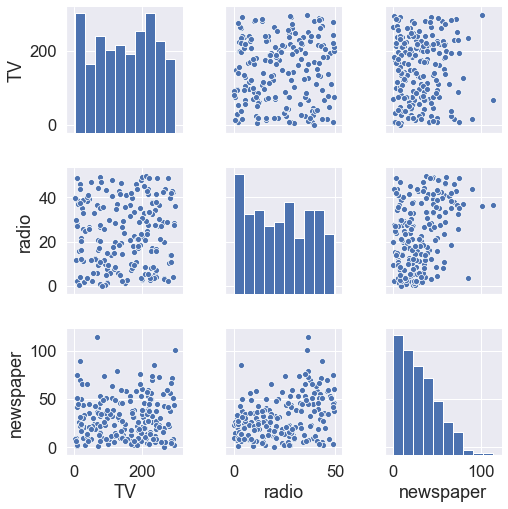

In [31]:
sns.pairplot( X);

In [8]:
# The diagonal of the above matirx shows the auto-correlation of the variables. 
# It is always 1. 

# observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and 
# then betweeb sales and radio i.e. 0.576.

# correlations can vary from -1 to +1. 
# Closer to +1 means strong positive correlation and close -1 means strong negative correlation. 
# Closer to 0 means not very strongly correlated. 

# variables with strong correlations are mostly probably candidates for model builing.**
df_training.drop(['Unnamed: 0'], axis=1).corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


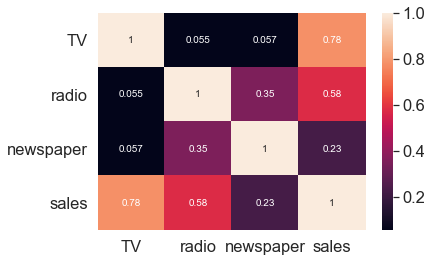

In [11]:
sns.heatmap( df_training.drop(['Unnamed: 0'], axis=1).corr(), annot=True );

In [9]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [10]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


In [11]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# fit the model to the training data (learn the coefficients)
#linreg_sm = smdl.OLS(y_train, X_train).fit()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# return beta coeff
linreg.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [14]:
linreg.intercept_

2.9372157346906107

In [15]:
y_test.shape

(60,)

In [16]:
# Making predictions
# make predictions on the testing set
y_pred = linreg.predict(X_test)

# predict using sm
#y_pred_sm = linreg.predict(X_test)

In [17]:
y_pred.shape

(60,)

In [21]:
y_test.shape

(60,)

In [18]:
feature_cols

['TV', 'radio', 'newspaper']

In [19]:
linreg.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [20]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046952047768484634),
 ('radio', 0.17658643526817372),
 ('newspaper', 0.0018511533188922125)]

In [46]:
# coefficients from sm
# linreg_sm.params

In [47]:
# y = 2.93 + 0.0466 * TV + 0.176 * Radio + 0.0018 * Newspaper

# 0.0466 * TV - per unit increase in TV spend will lead to 4.66% increase in sales
# 0.179 * Radio -                                          17.9% 
# 0.00345 * Newspaper - ...............                    0.3 % ....

In [120]:
# summary report from sm
# linreg_sm.summary()

In [23]:
# Model evaluation metrics for regression

print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred))

y-intercept             :  2.9372157346906107
beta coefficients       :  [0.04695205 0.17658644 0.00185115]
Mean Abs Error   MAE    :  1.0548328405073322
Mean Sq  Error MSE      :  1.9289249074665724
Root Mean Sq Error RMSE :  1.3888574107756968
r2 value                :  0.9224605706201435


In [122]:
df_training.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [123]:
# R-squared is a statistical measure of how close the data are to the fitted regression line.
# R-square signifies percentage of variations in the reponse variable that can be explained 
# by the model.
# R-squared = Explained variation / Total variation

# Total variation is variation of response variable around it's mean.
# R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the 
# variability, while 100% signifies that the model explains all the variability of the response. 
# The closer the r-square to 100%, the better is the model.

In [124]:
# How do we interpret the TV coefficient (0.0466)?

# For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending 
# is associated with a 0.0466 "unit" increase in Sales.

# Important notes:

# This is a statement of association, not causation.

# If an increase in TV ad spending was associated with a decrease in sales, 
# beta_1 would be negative.

In [125]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [126]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

# calculate MAE by hand
print((10 + 0 + 20 + 10)/4)

# calculate MAE using scikit-learn
print(metrics.mean_absolute_error(true, pred))
print(metrics.mean_absolute_error(y_test, y_pred))

10.0
10.0
1.0548328405073322


In [127]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

150.0
1.9289249074665724


In [128]:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

12.24744871391589
1.3888574107756968


In [129]:
# Computing the RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3888574107756968


In [130]:
# Feature selection
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046952047768484634),
 ('radio', 0.17658643526817372),
 ('newspaper', 0.0018511533188922125)]

In [131]:
# what does the coeff for newspaper say?

# For a given amount of Radio and TV adv spending, a "unit" increase in newspaper adv spending 
# is associated with a 0.0018 "unit" increase in Sales.

# can we remove the feature called 'newspaper'?

In [132]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]

# select a Series from the DataFrame
y = df_training.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.3879034699382886


In [133]:
# old RMSE : 1.3888574107756968

In [134]:
# The RMSE decreased when we removed Newspaper from the model. 
# (Error is something we want to minimize, so a lower number for RMSE is better.) 
# Thus, it is unlikely that this feature is useful for predicting Sales, 
# and should be removed from the model.

In [135]:
# calculate r2 score

y_true_ex = [3, -0.5, 2, 7]
y_pred_ex = [2.5, 0.0, 2, 8]
print(metrics.r2_score(y_true_ex, y_pred_ex))

0.9486081370449679


In [136]:
# calculate r2-score for our sales example
print(metrics.r2_score(y_test, y_pred))

0.9176214942248908


# Scaling 

In [137]:
df_training.drop(['Unnamed: 0'], axis=1, inplace=True)


In [138]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = df_training[feature_cols].values

# select a Series from the DataFrame
y = df_training['sales'].values

In [139]:
scaler = RobustScaler()
scaled_X = scaler.fit_transform(X)

In [140]:
# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, random_state=1, test_size=0.3)

In [141]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [142]:
# Model evaluation metrics for regression

print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred))

y-intercept             :  14.059781453623835
beta coefficients       :  [6.7822233  4.68836986 0.05988481]


ValueError: Found input variables with inconsistent numbers of samples: [60, 50]

Without scaling

    y-intercept             :  2.9372157346906107
    beta coefficients       :  [0.04695205 0.17658644 0.00185115]
    Mean Abs Error   MAE    :  1.0548328405073322
    Mean Sq  Error MSE      :  1.9289249074665724
    Root Mean Sq Error RMSE :  1.3888574107756968
    r2 value                :  0.9224605706201435

No Changes in the metrics

In [ ]:
[6.7822233  4.68836986 0.05988481]